# Interpolação utilizando uma onda Sinc
### Apresentando o Fenômeno de Gibbs

### Aluno: Lucas de Souza Abdalah
### Professores: João César e André Lima

## Bibliotecas

* $Numpy$: abreviatura para numeric python, é a biblioteca responsável pela funções numéricas e de programação científica usadas. Qualquer referência acerca de suas funções pode ser encontrada em http://www.numpy.org/
* $Matplotlib$: é a biblioteca padrão do python para o plot de gráficos. Ela tem funções que permitem gráficos 2d e 3d. A referência da biblioteca pode ser encontrada em https://matplotlib.org


In [146]:
#http://www.numpy.org/
import numpy as np
#https://matplotlib.org/index.html
import matplotlib.pyplot as plt
#Comando para plot mais organizado
%matplotlib inline

## Introdução Matemática

\begin{align}
    x(t) = \sum_{n=-\infty}^{\infty}x[n] \delta(t - nT)\\
\end{align}

\begin{align}
x(t) = \sum_{n=-\infty}^{\infty}x[n]\space sin(\dfrac{t - nT}{T})\\
\end{align}

\begin{align}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) * W(\mathrm{e}^{\,\mathrm{j}\, \Omega})
\end{align}

## Implementação


### Declarando o Vetor de Variáveis: 
* O espaço dos índices $n$ inteiros é gerado 
* O conjunto de amostras conhecido é concatenado

In [147]:
#https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html
#Gerando os índices n
n = np.linspace(-30,30,61)

#https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.concatenate.html
#Gerando as amostras do sinal em si em vetores e np.concatenate concatena os conteúdos dos vetores
x = np.concatenate((np.zeros(9), np.linspace(10,1,10), np.array([0]), np.linspace(1,10,10), np.array([11]), 
                    np.linspace(10,1,10), np.array([0]), np.linspace(1,10,10), np.zeros(9)), 0)

### Gráfico contendo x[n] contra n: 

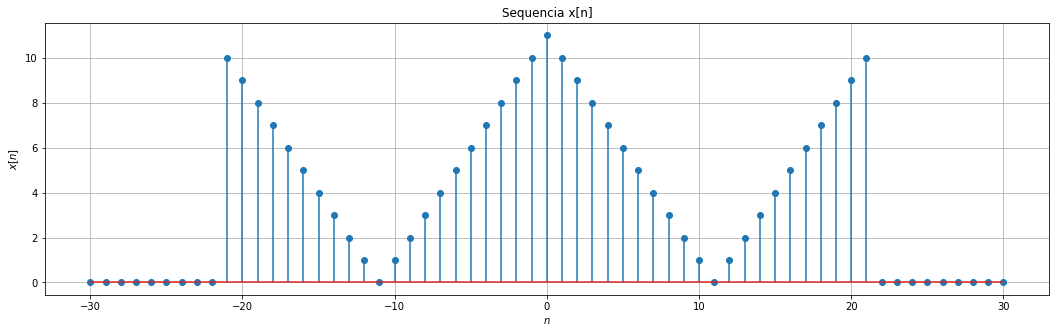

In [148]:
plt.figure(figsize=(18,5))
plt.stem(n, x, use_line_collection = True)
plt.title('Sequencia x[n]')
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid('on')
plt.show()

### Função Interpolação: 
* Recebemos na função o vetor de amostras de um sinal e o vetor da sua indexação no tempo [n]
* Sendo o espaçamento entre as amostras uniforme, calculamos o período utilizando as duas primeiras amostras
* Precisa receber no mínimo 3 amostras, pois o comparador utiliza essas três para "garantir" espaçamento uniforme.


In [149]:
def interpolador(x, n):
    #Calculamos o espaçamento(período) entre as amostras
    Ts = (n[1]- n[0])
    
    #Inicia a verificação do espaçamento das amostras.
    if (Ts != n[2] - n[1]):
        return("Espaçamento não uniforme.")
    
    else:
        #Utiliza a dimensão do espaço de amostras n para estimar um espaço de tempo contínuo
        halfsizen = int(len(n)/2)
    
        #Estima um tempo continuo (com o passo(distância entre as amostras) muito menor que em n)
        t = np.linspace(-halfsizen,halfsizen,20*(halfsizen))

        #vetor para inicializar a interpolacao, variavel que tem metade do tamanho do vetor n
        auxinterpolador = np.zeros(len(t))
    
        #Laço que prepara o ambiente para preencher o vetor auxinterpolador
        for indice in range(0,len(t)):
            aux=0
            #print('indice:', indice,'\t aux', aux)
            #Laço que realmente preeche o vetor recuperando as amostras de um sinal
            #obs: observe que o laço precisa percorrer os valores positivos e negativos do dominio
            for k in range(-halfsizen,halfsizen,1):
                auxinterpolador[indice] += (x[aux]*(np.sinc(((t[indice])/Ts)-k)))
                aux += 1
    
        #retorna o novo espaço de amostras e estima o sinal original
        return(auxinterpolador, t)

- - -

In [142]:
#Calcula a interpolacao com a funcao
a = interpolador(x,n)
#Atribuicao do retorno da funcao
aint, at = a[0], a[1]

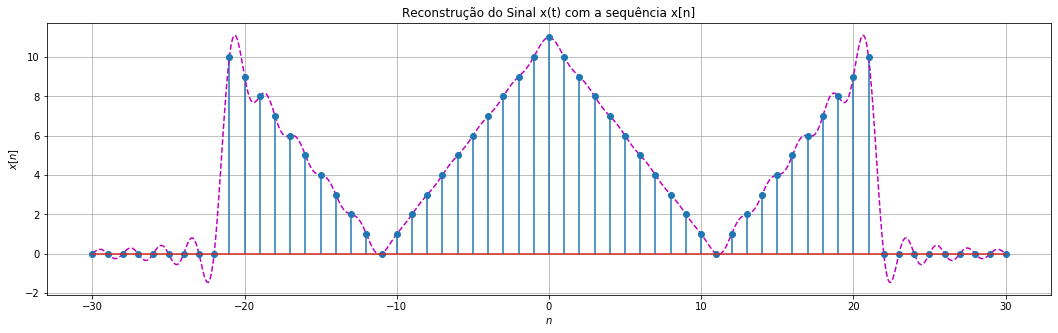

In [153]:
plt.figure(figsize=(18,5))
#Plota o sinal estimado contra o tempo continuo
plt.plot(at,aint, color='m',linestyle='--')
#Sinal discretizado em n
plt.stem(n,x, use_line_collection = True)
#Formatação do gráfico
plt.title('Reconstrução do Sinal x(t) com a sequência x[n]')
plt.xlabel(r'$n$')
plt.ylabel(r'$x[n]$')
plt.grid('on')
plt.show()

- - -

In [131]:
b = np.concatenate([np.exp(-0.1*n)])

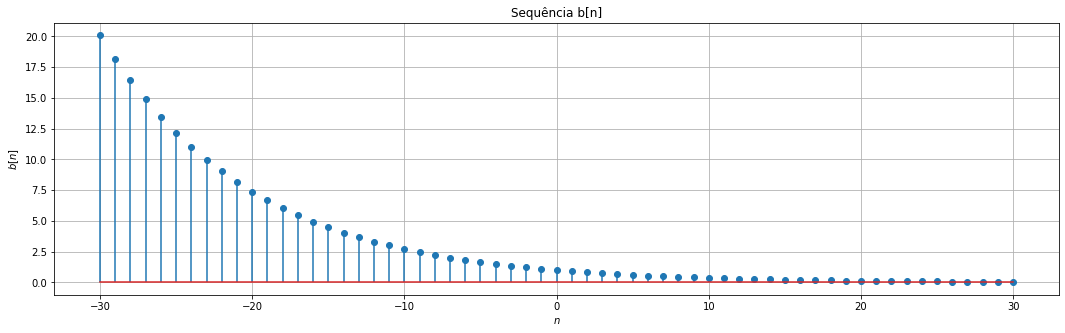

In [132]:
plt.figure(figsize=(18,5))
#Sinal discretizado em n
plt.stem(n,b, use_line_collection = True)
#Formatação do gráfico
plt.title('Sequência b[n]')
plt.xlabel(r'$n$')
plt.ylabel(r'$b[n]$')
plt.grid('on')
plt.show()

In [133]:
#Calcula a interpolação utilizando a função descrita acima
p = interpolador(b,n)

#A função retorna um vetor de duas posicao, 1) Sinal Reconstruido 2)Tempo teoricamente Continuo
paint, pat = p[0], p[1]

600


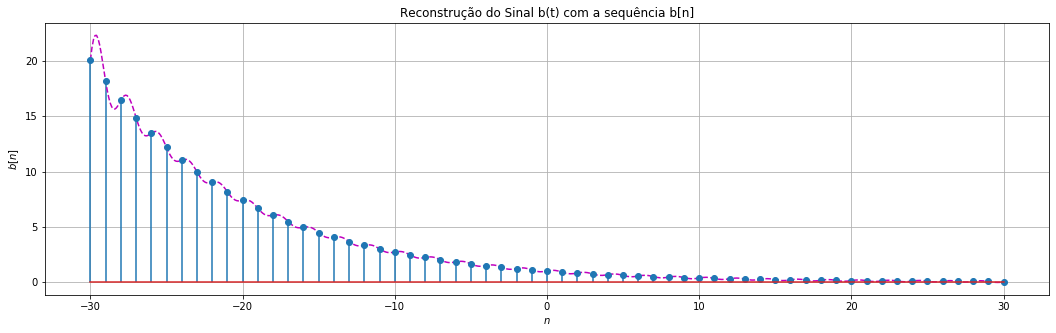

In [154]:
plt.figure(figsize=(18,5))
#Plota o sinal estimado contra o tempo continuo
plt.plot(pat,paint, color='m',linestyle='--')
#Sinal discretizado em n
plt.stem(n,b, use_line_collection = True)
#Formatação do gráfico
#Formatação do gráfico
plt.title('Reconstrução do Sinal b(t) com a sequência b[n]')
plt.xlabel(r'$n$')
plt.ylabel(r'$b[n]$')
plt.grid('on')
plt.show()

- - -